In [2]:
import pandas as pd
import json
from os import listdir
from os.path import isfile, join
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.ensemble import IsolationForest
from PIL import Image
from matplotlib.ticker import FuncFormatter
from scipy.spatial import KDTree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import csv
import math

In [2]:

rows = []

with open('all_player_coordinates.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name] + list(a))

#

df_trajectory = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

df_trajectory

Player           X           Y          Z
0        lelecabral-  1244.41056  1649.48336  769.06496
1        lelecabral-  1312.46184  1681.63392  620.76996
2        lelecabral-  1543.68608  1730.80176  382.95936
3        lelecabral-  1578.45376  1752.26880  135.93306
4       21c_0o0kk0o0   498.85432  1596.55360  769.06496
...              ...         ...         ...        ...
233907       Luchari   973.75184  2321.50080  702.95344
233908       Luchari   890.59792  2534.75936  463.64952
233909       Luchari   805.73896  2753.64288  228.87010
233910       Luchari   766.17560  2865.87840  122.33683
233911       Luchari   738.27560  2924.92448   72.77400

[233912 rows x 4 columns]

In [ ]:
# Summary statistics for each variable
summary = df.describe()
summary

In [70]:
# For individual player
player_summary = df.groupby('Player').describe()
player_summary

X                                             \
                count           mean           std           min   
Player                                                             
000_CEKATOP_000   1.0  507158.125000           NaN  507158.12500   
001-MasterMan     6.0  337078.203125  39288.898058  283918.28125   
001jik            6.0  335590.437500  25854.634425  305929.68750   
001kz01           6.0  412129.718750  39404.741649  373311.00000   
0055__-           6.0  151004.750000  20031.375301  126284.75000   
...               ...            ...           ...           ...   
zymr_             6.0  350624.119792  30591.439233  320147.90625   
zywiecek          5.0  531552.700000  31206.459625  482529.68750   
zz1haoWang        5.0  355123.256250  26311.736535  327451.46875   
zz495935          7.0  313808.263393  40040.360403  274968.00000   
zzzLeal           6.0  214223.216146  47611.703123  168667.00000   

                                                                            \
                           25%            50%            75%           max   
Player                                                                       
000_CEKATOP_000  507158.125000  507158.125000  507158.125000  507158.12500   
001-MasterMan    305532.695312  348815.671875  369659.890625  373206.59375   
001jik           312157.570312  338684.875000  356148.289062  364958.62500   
001kz01          379734.648438  402575.125000  443896.445312  464525.68750   
0055__-          134266.050781  153041.437500  167716.011719  173045.75000   
...                        ...            ...            ...           ...   
zymr_            326166.648438  343275.187500  372209.328125  394728.59375   
zywiecek         518850.437500  547958.937500  550047.062500  558377.37500   
zz1haoWang       335321.093750  348156.375000  375982.187500  388705.15625   
zz495935         283916.750000  293583.531250  343397.671875  373477.46875   
zzzLeal          175233.425781  202260.781250  247733.015625  283036.00000   

                    Y                 ...                                  Z  \
                count           mean  ...            75%           max count   
Player                                ...                                      
000_CEKATOP_000   1.0  584419.375000  ...  584419.375000  584419.37500   1.0   
001-MasterMan     6.0  271933.841146  ...  289731.843750  297695.03125   6.0   
001jik            6.0  467953.791667  ...  492902.828125  501111.12500   6.0   
001kz01           6.0  264988.250000  ...  291817.710938  296907.78125   6.0   
0055__-           6.0  294107.000000  ...  295319.148438  296036.28125   6.0   
...               ...            ...  ...            ...           ...   ...   
zymr_             6.0  392702.781250  ...  418815.750000  443293.31250   6.0   
zywiecek          5.0  285351.262500  ...  291585.250000  292075.65625   5.0   
zz1haoWang        5.0  326681.850000  ...  344414.500000  350364.71875   5.0   
zz495935          7.0  490329.549107  ...  522054.187500  540608.81250   7.0   
zzzLeal           6.0  259164.361979  ...  273696.476562  276476.40625   6.0   

                                                                            \
                          mean           std            min            25%   
Player                                                                       
000_CEKATOP_000  150208.000000           NaN  150208.000000  150208.000000   
001-MasterMan     68415.906413  60919.248198    8196.360352   17298.070312   
001jik            74296.628743  64701.511353    4773.008789   20120.162598   
001kz01           66172.891276  60124.652690    7913.335938   16461.197266   
0055__-           60592.230143  59657.874547   10082.845703   13831.609375   
...                        ...           ...            ...            ...   
zymr_             66911.985677  57605.109586   13706.755859   19709.676270   
zywiecek          69252.273242  58326.499429   12952.448242   21984.96484

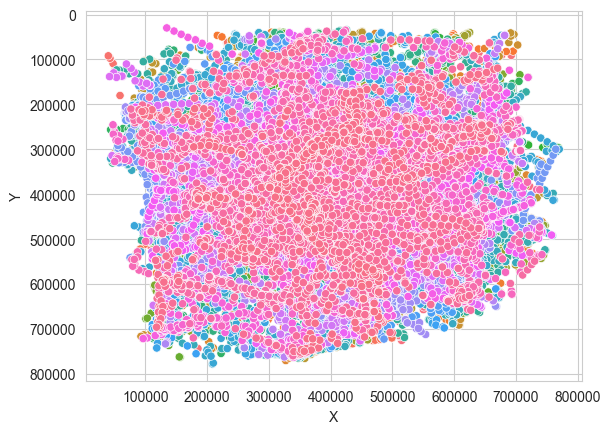

In [56]:
scatter = sns.scatterplot(data=df, x='X', y='Y', hue='Player')
scatter.legend_.remove()
plt.gca().invert_yaxis()
plt.show()


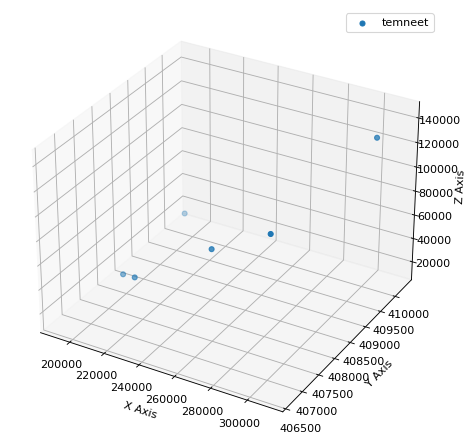

In [18]:
# Assuming player_data is already defined and contains the necessary data
df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])

# Create a 3D plot with reduced DPI
fig = plt.figure(figsize=(10, 7), dpi=80)  # Adjust DPI here
ax = fig.add_subplot(111, projection='3d')

# Set limits for the axes
ax.set_xlim([df['X'].min(), df['X'].max()])
ax.set_ylim([df['Y'].min(), df['Y'].max()])
ax.set_zlim([df['Z'].min(), df['Z'].max()])

# Plot data
for player in df['Player'].unique():
    player_data = df[df['Player'] == player]
    ax.scatter(player_data['X'], player_data['Y'], player_data['Z'], label=player)

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.legend()

# Save the plot to a file instead of rendering inline
plt.savefig('3d_scatter_plot.png')


In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Example: Scatter plot
# sns.scatterplot(data=df, x='X', y='Y', hue='Player')
# plt.show()

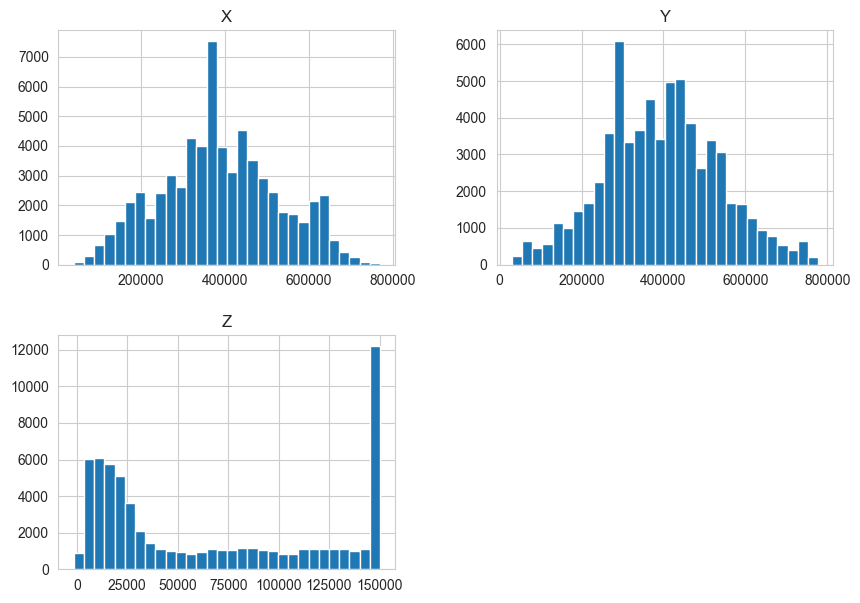

In [40]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms
df[['X', 'Y', 'Z']].hist(bins=30, figsize=(10, 7))
plt.show()

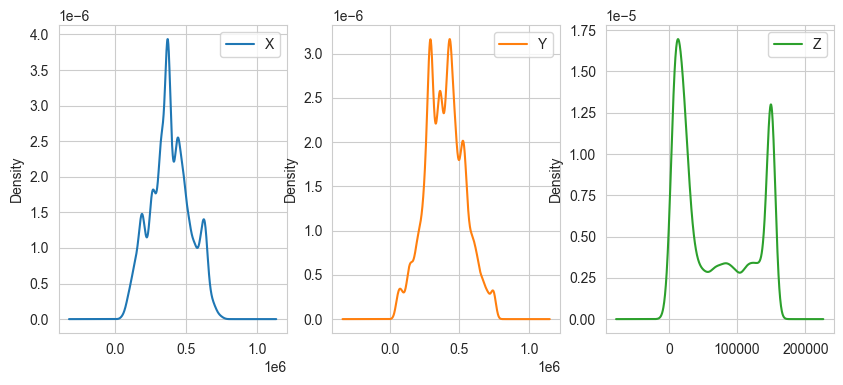

In [41]:
# Plot density plots
df[['X', 'Y', 'Z']].plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(10, 4))
plt.show()

C:\Users\robuc\anaconda3\envs\pytensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


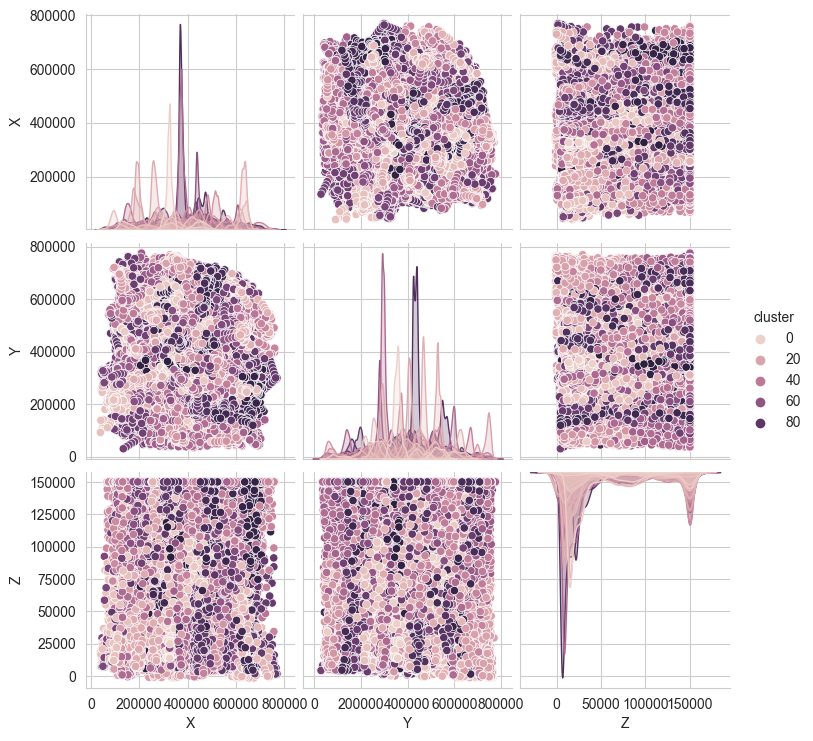

In [55]:


# Assume there are three clusters in your data
kmeans = KMeans(n_clusters=100, random_state=0).fit(df[['X', 'Y', 'Z']])
df['cluster'] = kmeans.labels_

# Plot clusters
sns.pairplot(df[['X', 'Y', 'Z', 'cluster']], hue='cluster')
plt.gca().invert_yaxis()
plt.show()


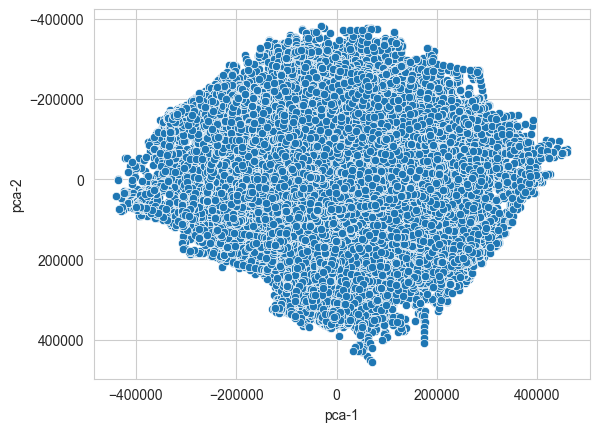

In [104]:


# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['X', 'Y', 'Z']])
df['pca-1'] = pca_result[:, 0]
df['pca-2'] = pca_result[:, 1]

# Plot the result
sns.scatterplot(x='pca-1', y='pca-2', data=df)
plt.gca().invert_yaxis()
plt.show()


In [3]:

# Use KMeans clustering to find common drop zones
kmeans = KMeans(n_clusters=30) 
df['cluster'] = kmeans.fit_predict(df[['X', 'Y']])


C:\Users\robuc\anaconda3\envs\pytensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [4]:

# Anomaly detection
iso_forest = IsolationForest()
outliers = iso_forest.fit_predict(df[['X', 'Y', 'Z']])

# Add a column for outliers
df['outlier'] = outliers
df['outlier'] = df['outlier'].map({-1: 'Outlier', 1: 'Inlier'})  # Convert to categorical


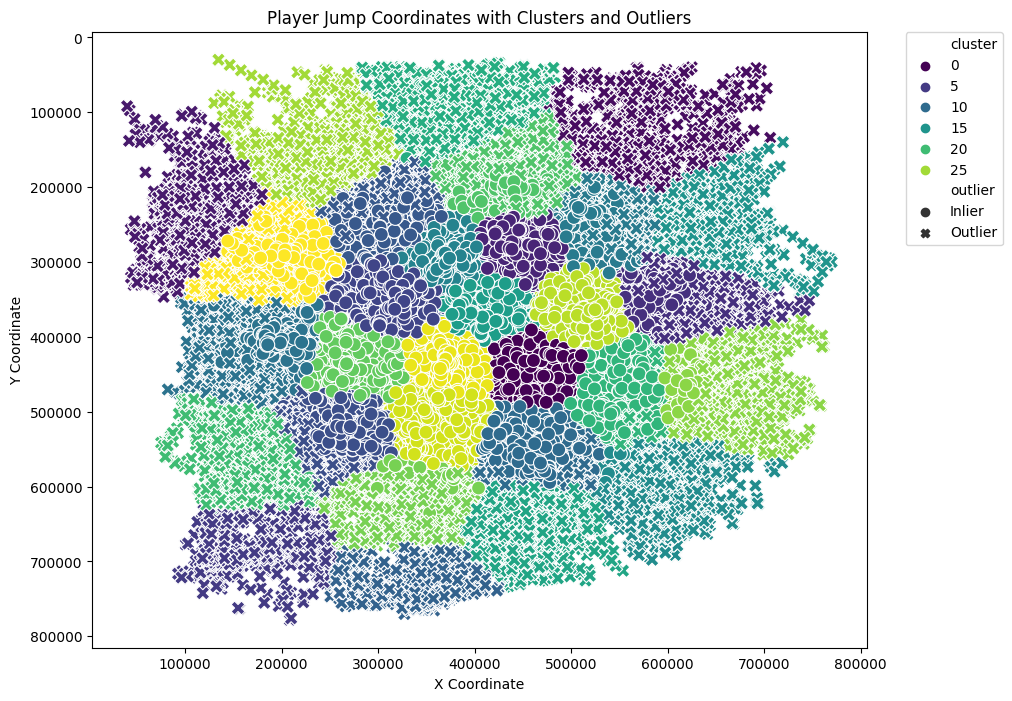

In [7]:

# Plotting
plt.figure(figsize=(10, 8))

# Scatter plot for clusters
sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='viridis', style='outlier', markers={'Outlier': 'X', 'Inlier': 'o'}, s=100)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Title and labels
plt.title('Player Jump Coordinates with Clusters and Outliers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()

plt.show()

In [39]:

# Assuming df is your DataFrame with 'X' and 'Y' being the coordinates

# Calculate the point density
xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]


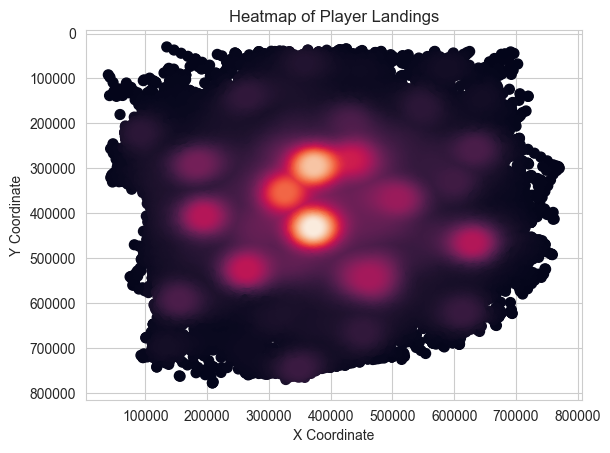

In [51]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()
plt.show()

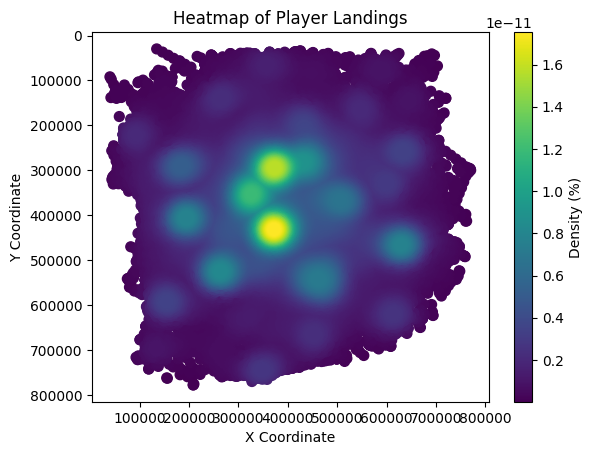

In [8]:


# Assuming df is your DataFrame with 'X' and 'Y' being the coordinates
# Calculate the point density
xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=50)
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()

# Create colorbar as a legend
cbar = plt.colorbar(scatter)
cbar.set_label('Density (%)')

plt.show()


In [50]:

x = df['X']
y = df['Y']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

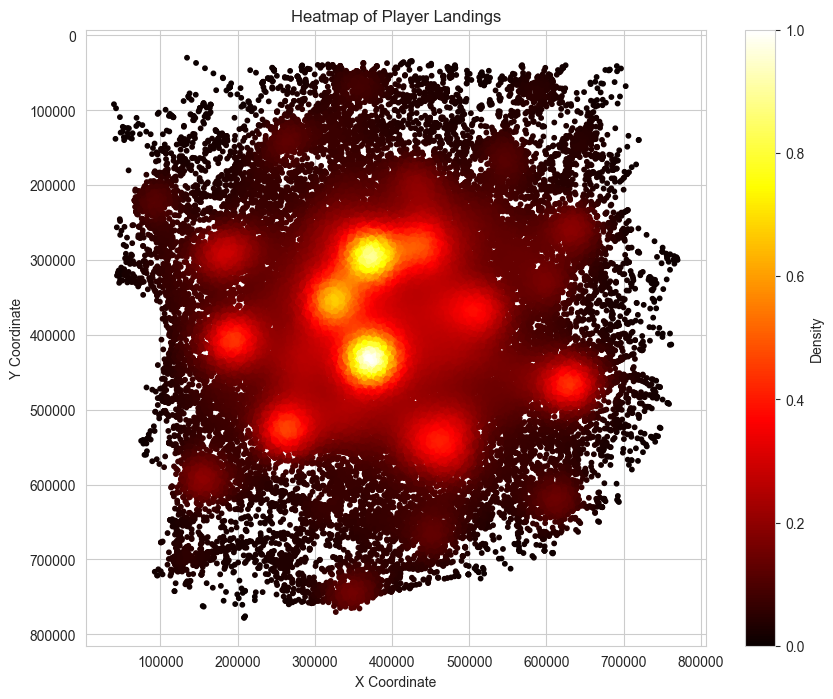

In [54]:
# Normalize z for better color mapping
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(x, y, c=z, s=10, cmap='hot')  

plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(scatter, ax=ax, label='Density')
plt.gca().invert_yaxis()

plt.show()

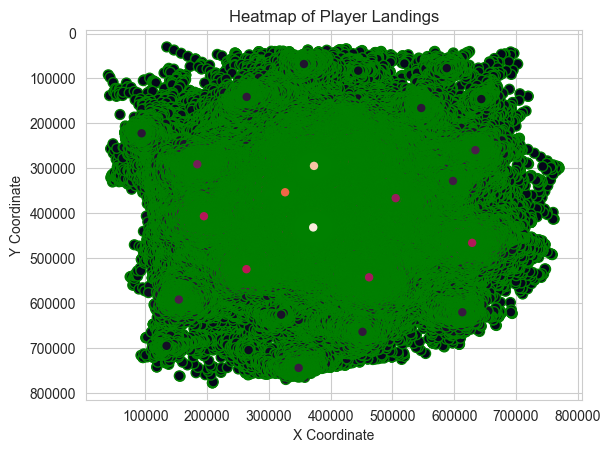

In [52]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='green')
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()
plt.show()

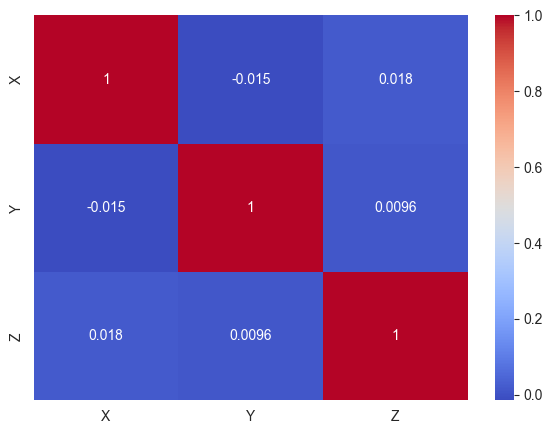

In [57]:
# Calculate correlations
correlations = df[['X', 'Y', 'Z']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(7, 5))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()


In [264]:


df_sorted = df.sort_values(by=['Player', 'Z'], ascending=[True, False])


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each player's trajectory
for player in df_sorted['Player'].unique():
    player_data = df_sorted[df_sorted['Player'] == player]
    ax.plot(player_data['X'], player_data['Y'], player_data['Z'], label=player)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Altitude (Z)')
plt.title('Player Trajectories')
plt.legend(loc='best')
plt.show()


In [46]:
# Calculate the differences in the X, Y, and Z coordinates
df_sorted['dX'] = df_sorted.groupby('Player')['X'].diff().fillna(0)
df_sorted['dY'] = df_sorted.groupby('Player')['Y'].diff().fillna(0)
df_sorted['dZ'] = df_sorted.groupby('Player')['Z'].diff().fillna(0)

# Assuming uniform time intervals, calculate the approximate velocity and acceleration for each axis
df_sorted['velocity_X'] = df_sorted['dX'].diff().fillna(0)
df_sorted['velocity_Y'] = df_sorted['dY'].diff().fillna(0)
df_sorted['velocity_Z'] = df_sorted['dZ'].diff().fillna(0)

df_sorted['acceleration_X'] = df_sorted['velocity_X'].diff().fillna(0)
df_sorted['acceleration_Y'] = df_sorted['velocity_Y'].diff().fillna(0)
df_sorted['acceleration_Z'] = df_sorted['velocity_Z'].diff().fillna(0)


In [47]:
df_sorted['speed'] = np.sqrt(df_sorted['velocity_X']**2 + df_sorted['velocity_Y']**2 + df_sorted['velocity_Z']**2)


# LANDING POINT

In [3]:

# Step 1: Read the CSV file and create a list of rows
rows = []

with open('all_player_coordinates_landing_test.csv', 'r') as file:
    csv_reader = csv.reader(file)
    rows = list(csv_reader)

player_data = []

for row in rows[1:]:  # skip the header row
    x, y, z, player_name = row
    a = [float(x)/195.3125,float(y)/195.3125,float(z)/195.3125]
    player_data.append([player_name]+list(a))
    
    
#/195.3125


df = pd.DataFrame(player_data, columns=['Player', 'X', 'Y', 'Z'])
df

Player           X           Y          Z
0           lelecabral-  1627.95872  1788.92560  70.791840
1          21c_0o0kk0o0   843.67600  1393.47776  46.611290
2       VeenoomMDFCBIT-  1663.81552  1819.47936  71.200755
3             pelungas_  3100.84672  1877.16064  50.915025
4        FelipeFreitas-  2861.21888  1485.72032  64.084155
...                 ...         ...         ...        ...
118113       Nmg_Kil1er  2920.53728   400.29060  34.248942
118114          jjjj523  2920.49056   404.23960  33.160280
118115      Exlusivikys  3099.17184   425.91692  43.600120
118116     OlzhasTalgat  3064.51168   351.08412  33.276958
118117    GreenSinister  3073.55808   369.50004  35.710945

[118118 rows x 4 columns]

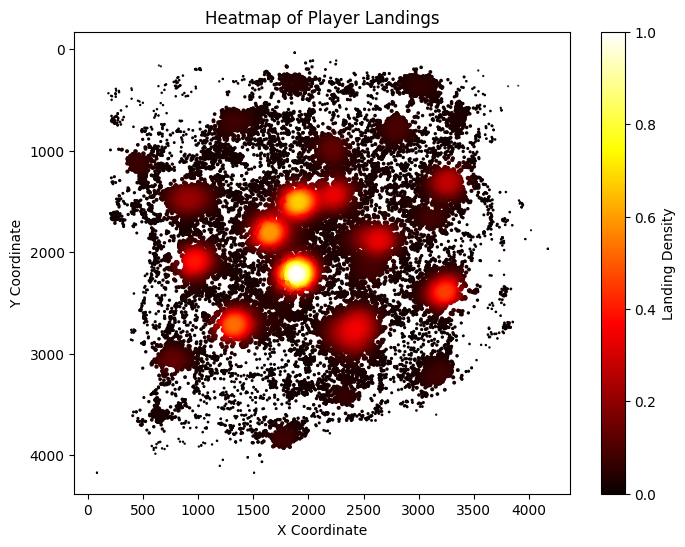

In [4]:
xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]

# Normalize z for better color mapping
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z, s=np.sqrt(z)*20, cmap='hot')  # Adjust size based on z and use a heatmap color scheme
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(scatter, ax=ax, label='Landing Density')  # Add a colorbar for reference
plt.gca().invert_yaxis()

plt.show()

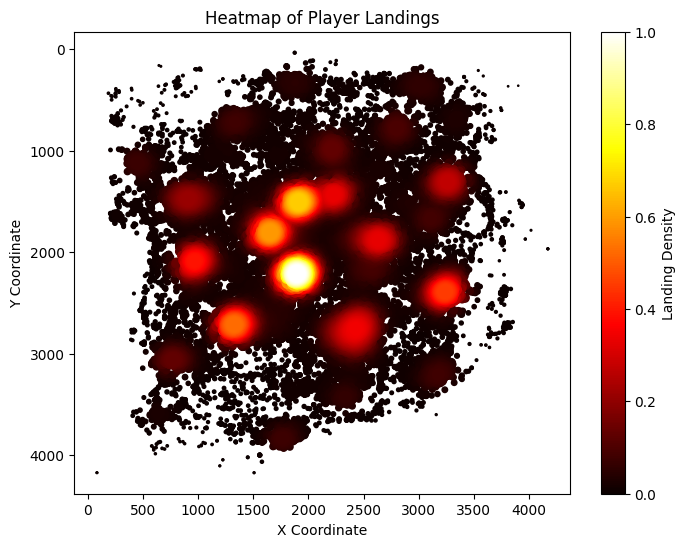

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z, s=np.sqrt(z)*100, cmap='hot')  # Adjust size based on z and use a heatmap color scheme
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(scatter, ax=ax, label='Landing Density')  # Add a colorbar for reference
plt.gca().invert_yaxis()

plt.show()

In [263]:
# Summary statistics for each variable
summary = df.describe()

# For individual player
player_summary = df.groupby('Player').describe()
player_summary

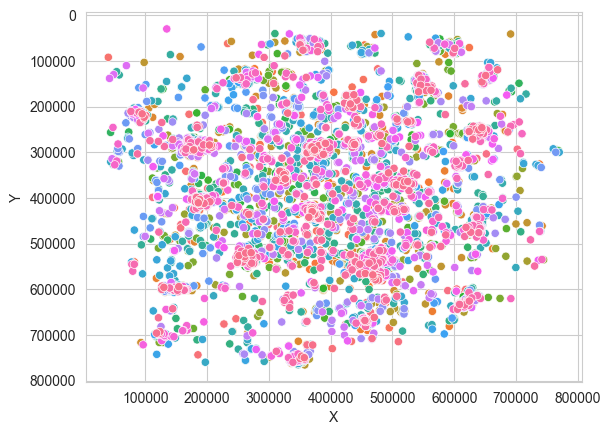

In [79]:

scatter = sns.scatterplot(data=df, x='X', y='Y', hue='Player')
scatter.legend_.remove()
plt.gca().invert_yaxis()
plt.show()

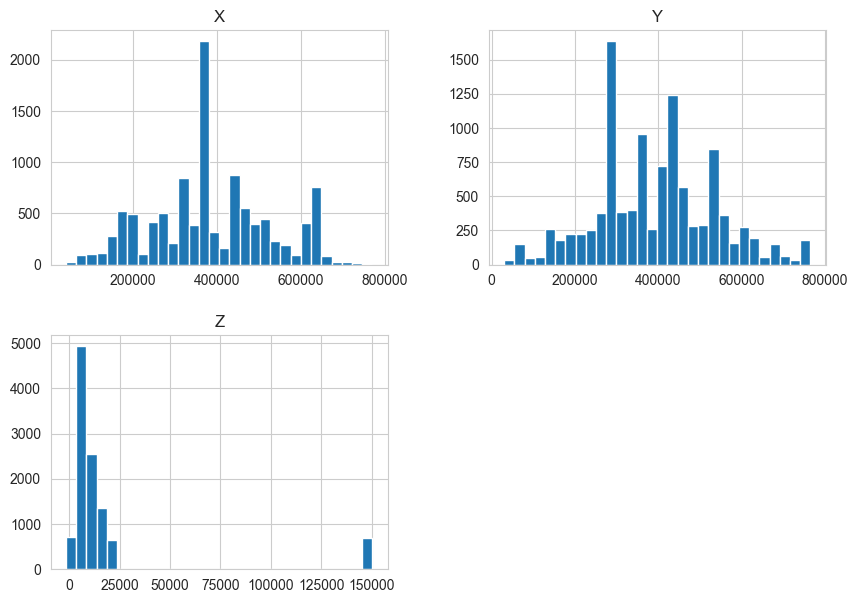

In [63]:


# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms
df[['X', 'Y', 'Z']].hist(bins=30, figsize=(10, 7))
plt.show()


In [ ]:
# Plot density plots
df[['X', 'Y', 'Z']].plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(10, 4))
plt.show()

C:\Users\robuc\anaconda3\envs\pytensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


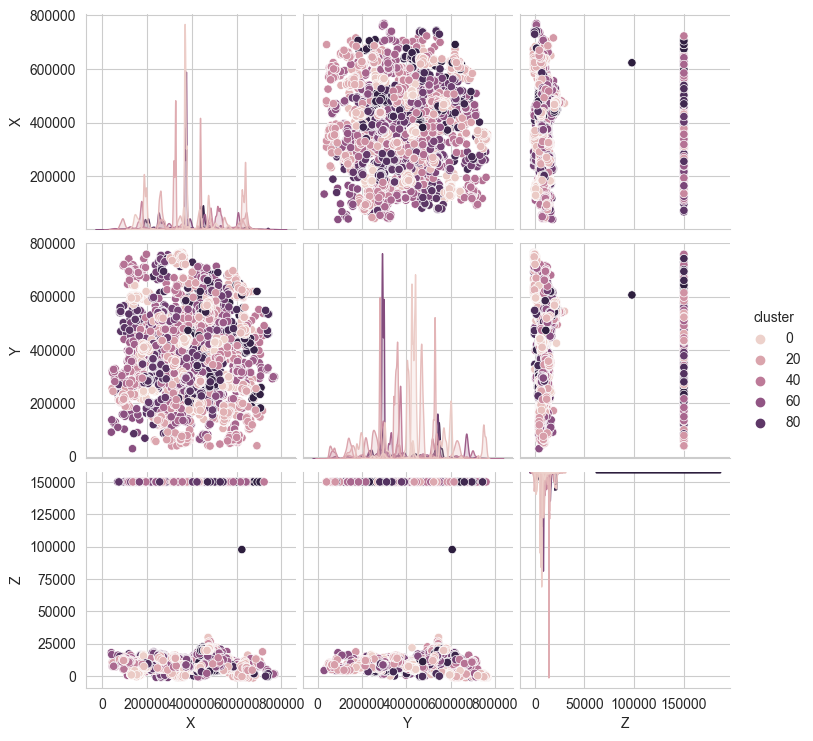

In [81]:


# Assume there are three clusters in your data
kmeans = KMeans(n_clusters=100, random_state=0).fit(df[['X', 'Y', 'Z']])
df['cluster'] = kmeans.labels_

# Plot clusters
sns.pairplot(df[['X', 'Y', 'Z', 'cluster']], hue='cluster')
plt.gca().invert_yaxis()
plt.show()

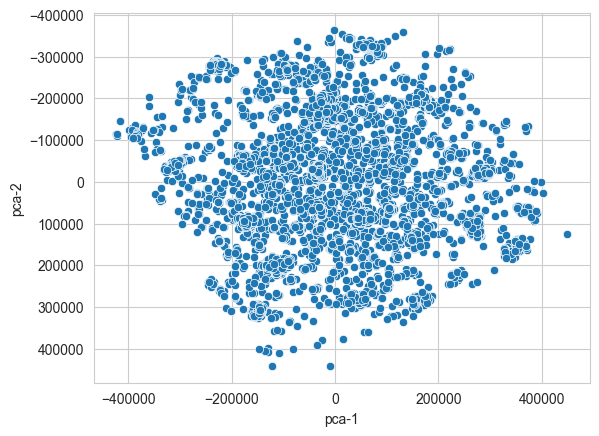

In [82]:

# Perform PCA
pca = PCA(n_components=0.99)
pca_result = pca.fit_transform(df[['X', 'Y', 'Z']])
df['pca-1'] = pca_result[:, 0]
df['pca-2'] = pca_result[:, 1]

# Plot the result
sns.scatterplot(x='pca-1', y='pca-2', data=df)
plt.gca().invert_yaxis()
plt.show()

In [18]:


# Use KMeans clustering to find common drop zones
kmeans = KMeans(n_clusters=30) 
df['cluster'] = kmeans.fit_predict(df[['X', 'Y','Z']])

C:\Users\robuc\anaconda3\envs\pytensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:

# Anomaly detection
iso_forest = IsolationForest()
outliers = iso_forest.fit_predict(df[['X', 'Y', 'Z']])

# Add a column for outliers
df['outlier'] = outliers
df['outlier'] = df['outlier'].map({-1: 'Outlier', 1: 'Inlier'})  # Convert to categorical

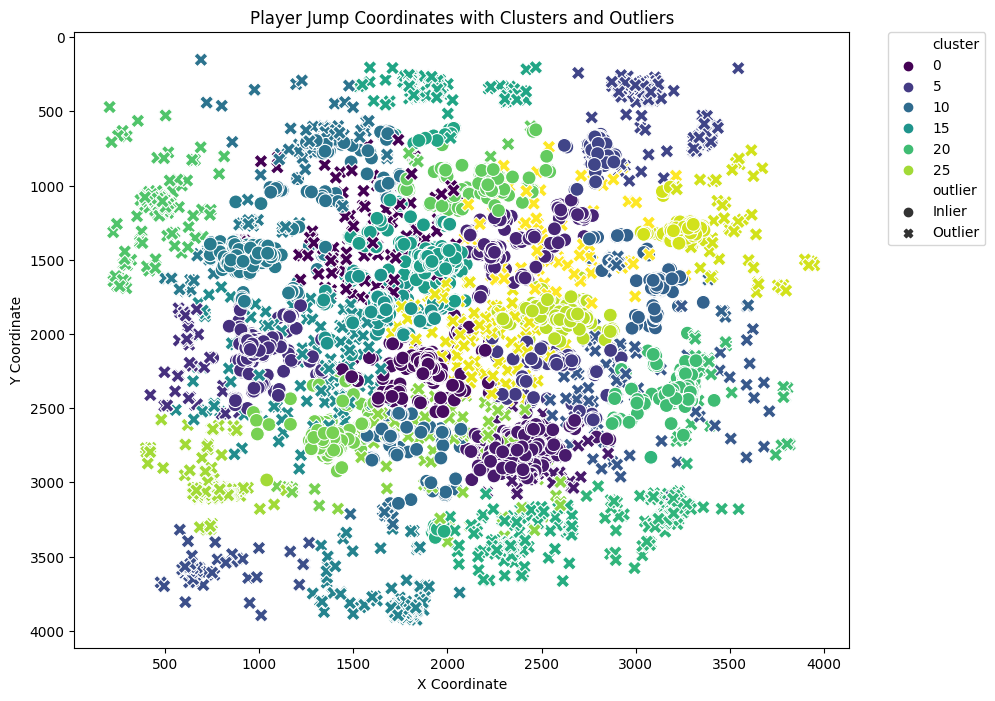

In [22]:

# Plotting
plt.figure(figsize=(10, 8))

# Scatter plot for clusters
sns.scatterplot(data=df, x='X', y='Y', hue='cluster', palette='viridis', style='outlier', markers={'Outlier': 'X', 'Inlier': 'o'}, s=100)


# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Title and labels
plt.title('Player Jump Coordinates with Clusters and Outliers')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis() 

In [86]:


# Assuming df is your DataFrame with 'X' and 'Y' being the coordinates

# Calculate the point density
xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]

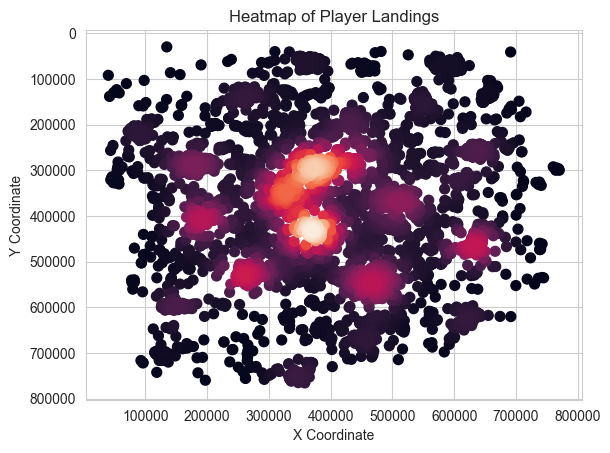

In [87]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=20)
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()
plt.show()

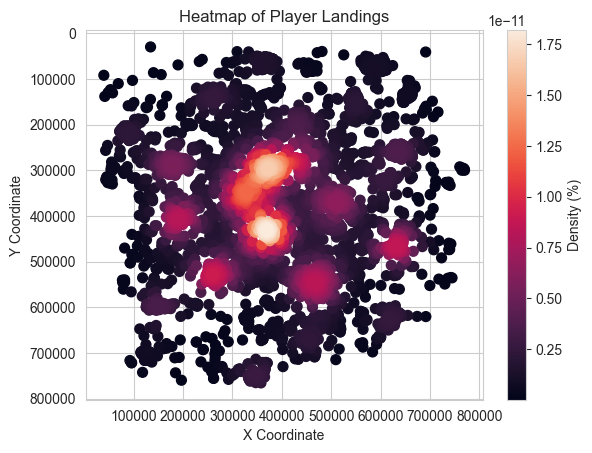

In [57]:


# Assuming df is your DataFrame with 'X' and 'Y' being the coordinates
# Calculate the point density
xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, c=z, s=50)
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()

# Create colorbar as a legend
cbar = plt.colorbar(scatter)
cbar.set_label('Density (%)')

plt.show()

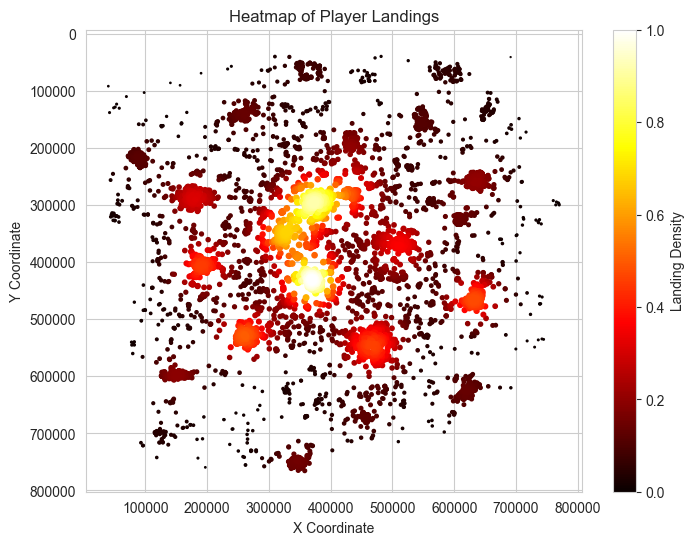

In [60]:

xy = np.vstack([df['X'], df['Y']])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = df['X'][idx], df['Y'][idx], z[idx]

# Normalize z for better color mapping
z = (z - z.min()) / (z.max() - z.min())

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z, s=np.sqrt(z)*20, cmap='hot')  # Adjust size based on z and use a heatmap color scheme
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(scatter, ax=ax, label='Landing Density')  # Add a colorbar for reference
plt.gca().invert_yaxis()

plt.show()


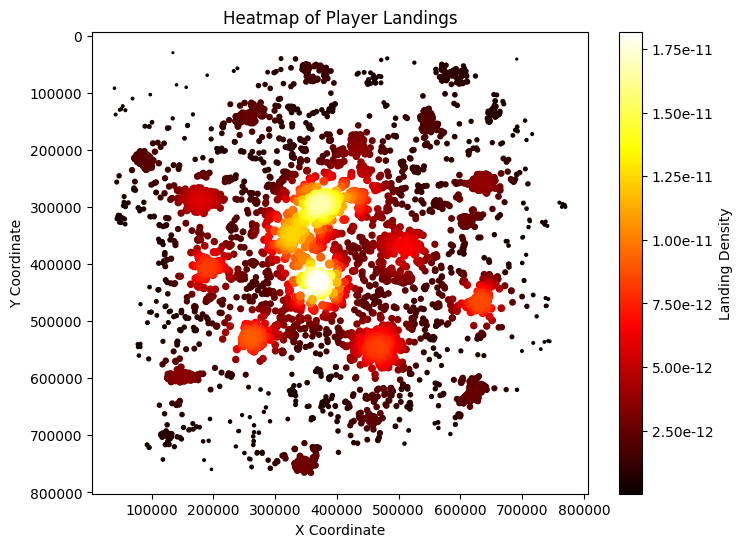

In [33]:

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(x, y, c=z, s=np.sqrt(z)*10**7, cmap='hot')

plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()

# Colorbar with custom tick formatter
cbar = plt.colorbar(scatter, ax=ax, label='Landing Density')

# Define a custom formatter function
def custom_formatter(x, pos):
    return f'{x:.2e}'  # Adjust the format here as needed

cbar.formatter = FuncFormatter(custom_formatter)
cbar.update_ticks()

plt.show()

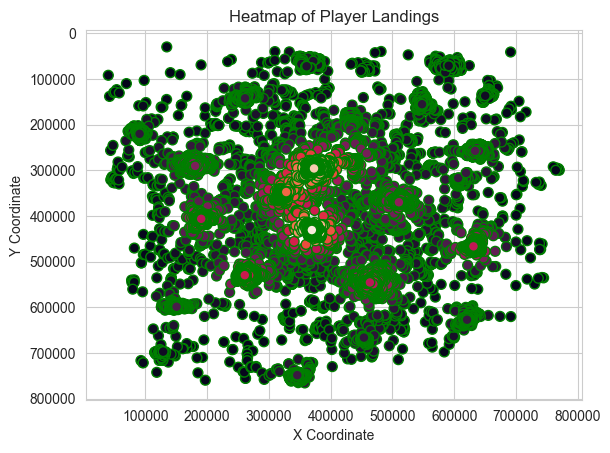

In [88]:
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50, edgecolor='green')
plt.title('Heatmap of Player Landings')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()
plt.show()